# PREVENDO DIABETES (PYTHON)

> *Este conjunto de dados é originalmente do Instituto Nacional de Diabetes e Doenças Digestivas e Renais. Seu objetivo é prever se um paciente tem diabetes ou não, com base em certas medidas diagnósticas incluídas no conjunto de dados. Várias restrições foram colocadas na seleção dessas instâncias de um banco de dados maior. Em particular, todos os pacientes aqui são mulheres com pelo menos 21 anos de herança indígena Pima.* <br>

<br>
Utilizamos os algorítmos Regressão Logística, Random Forest, Gradient Boosting, XGBoost
<br>

**Dataset:** https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [1]:
# Carregar pacotes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm, tree, metrics
from xgboost import XGBClassifier

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# Importar dados
df_diabetes= pd.read_csv("diabetes.csv")

In [3]:
# Informações gerais dos dados
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
# Visualizar as cinco primeiras linhas do dataset
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Visualizar as cinco últimas linhas do dataset
df_diabetes.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
# Estatística descritiva dos dados
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# Checar NAs
df_diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## 2. LIMPEZA, TRANSFORMAÇÃO E ANÁLISE EXPLORATÓRIA DOS DADOS

**2.1 Dicionário das Variáveis** <br>
<br>
**Pregnancies:** Número de vezes que engravidou <br>
**Glucose:** Concentração de glicose plasmática após duas horas do teste <br>
**BloodPressure:** Pressão arterial diastólica (mm Hg) <br>
**SkinThickness:** Espessura da dobra de pele do tríceps (mm)v
**Insulin:** Insulina sérica após 2 horas do teste <br>
**BMI:** Índice de massa corporal <br>
**DiabetesPedigreeFunction:** Função que mede tendência a partir do histórico familiar <br>
**Age:** Idade <br>
**Outcome:** variável dependente (0 e 1) <br>

### Variáveis

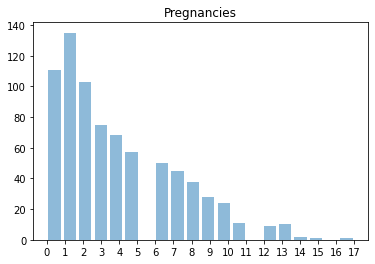

In [8]:
# Plotando variável Pregnancies
plt.hist(df_diabetes["Pregnancies"],bins=20,histtype="bar",rwidth=.8,alpha=0.5)
plt.title("Pregnancies")
plt.xlabel("")
plt.xticks(range(min(df_diabetes["Pregnancies"]), max(df_diabetes["Pregnancies"])+1))
plt.show()

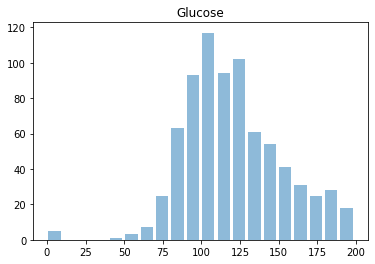

In [9]:
# Plotando variável Glucose
plt.hist(df_diabetes["Glucose"],bins=20,histtype="bar",rwidth=.8,alpha=0.5)
plt.title("Glucose")
plt.xlabel("")
plt.show()

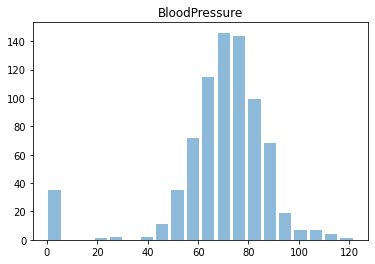

In [10]:
# Plotando variável BloodPressure
plt.hist(df_diabetes["BloodPressure"],bins=20,histtype="bar",rwidth=.8,alpha=0.5)
plt.title("BloodPressure")
plt.xlabel("")
plt.show()

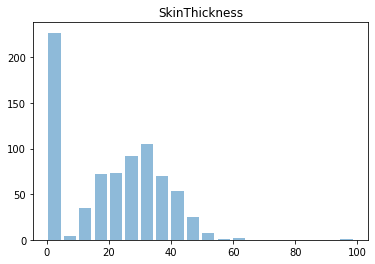

In [11]:
# Plotando variável SkinThickness
plt.hist(df_diabetes["SkinThickness"],bins=20,histtype="bar",rwidth=.8,alpha=0.5)
plt.title("SkinThickness")
plt.xlabel("")
plt.show()

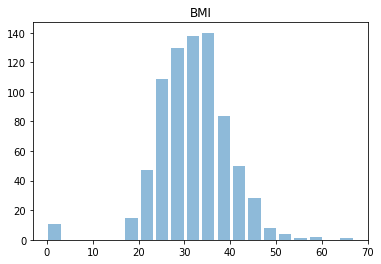

In [12]:
# Plotando variável BMI
plt.hist(df_diabetes["BMI"],bins=20,histtype="bar",rwidth=.8,alpha=0.5)
plt.title("BMI")
plt.xlabel("")
plt.show()

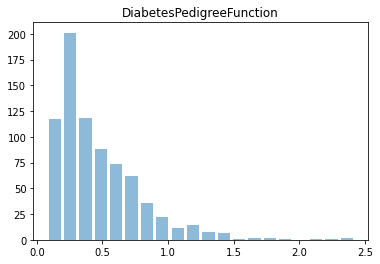

In [13]:
# Plotando variável DiabetesPedigreeFunction
plt.hist(df_diabetes["DiabetesPedigreeFunction"],bins=20,histtype="bar",rwidth=.8,alpha=0.5)
plt.title("DiabetesPedigreeFunction")
plt.xlabel("")
plt.show()

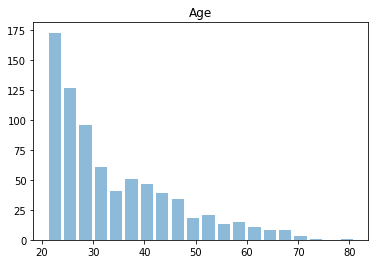

In [14]:
# Plotando variável Age
plt.hist(df_diabetes["Age"],bins=20,histtype="bar",rwidth=.8,alpha=0.5)
plt.title("Age")
plt.xlabel("")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


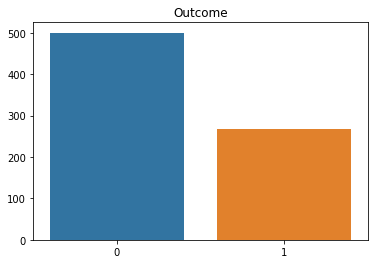

In [15]:
# Plotando variável Outcome
sns.countplot(df_diabetes["Outcome"])
plt.title("Outcome")
plt.ylabel("")
plt.xlabel("")
plt.show()

### 2.3 Limpando e Transformando Variáveis

Algumas variáveis possuem valores estranhos e devemos tomar uma decisão sobre como proceder.

* Pregnancies: uma observação possui o valor de 17. Embora seja incomum, é possível que uma mulher tenha 17 gravidezes. Optamos por não realizar nenhum procedimento. <br>
* As variáveis Glucose (5), Bloodpressure (35), SkinThickness (227), Insulin (374) e BMI (11) possuem observações com valor zero. Dado suas características devemos realizar alterações. Iremos substituir os valores zero pela sua média.

## 3. CONSTRUINDO MODELO

In [16]:
# Variáveis independentes
X = df_diabetes.drop("Outcome", axis = 1)

In [17]:
# Substituindo valores 0 em X pela média
X.replace(0,X.mean(axis=0),inplace=True)

In [18]:
# Variável dependente
y= df_diabetes["Outcome"]

In [19]:
# Visualizando as dimensões de X e y
print(X.shape,y.shape)

(768, 8) (768,)


In [20]:
# Aplicar SMOTE
smote_bal= SMOTE()
X_res,y_res= smote_bal.fit_resample(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [21]:
# Separar dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res,test_size=0.3)

In [22]:
# Padronizando os dados
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

### MODELOS

### Regressão Logística

In [23]:
# Construindo modelo 1
model_v1= LogisticRegression().fit(X_train, y_train)

In [24]:
# Fazendo previsões
glm_pred_v1= model_v1.predict(X_test)

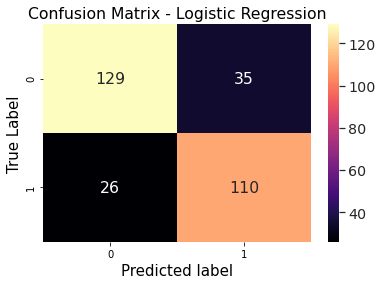

<Figure size 720x504 with 0 Axes>

In [25]:
# Criando matriz de confusão
confusion_matrix = metrics.confusion_matrix(y_test, glm_pred_v1)
# Transformando em dataframe
matrix_df = pd.DataFrame(confusion_matrix)
# Plotando matriz de confusão
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
ax.set_title('Confusion Matrix - Logistic Regression')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_ylabel("True Label", fontsize=15)
plt.show()

In [26]:
# Relatório da classificação
print(classification_report(y_test, glm_pred_v1))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81       164
           1       0.76      0.81      0.78       136

    accuracy                           0.80       300
   macro avg       0.80      0.80      0.80       300
weighted avg       0.80      0.80      0.80       300



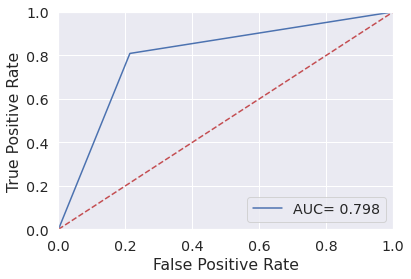

In [27]:
# Plotando curva ROC
fpr,tpr,threshold=roc_curve(y_test,glm_pred_v1) 
roc_auc=auc(fpr,tpr)   
plt.plot(fpr,tpr,'b',label= 'AUC= %0.3f' % roc_auc) 
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### XGBoost

In [28]:
# Construindo modelo 2
clc_XGB= XGBClassifier()
modelXGB_v1= clc_XGB.fit(X_train,y_train)

In [29]:
# Fazendo previsões XGBoost
predXGB_v1= modelXGB_v1.predict(X_test)

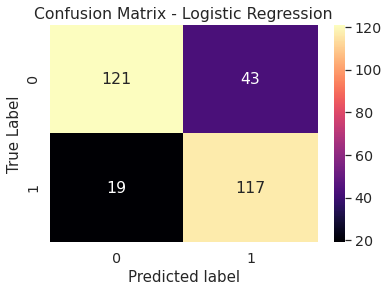

<Figure size 720x504 with 0 Axes>

In [30]:
# Criando matriz de confusão
confusion_matrix = metrics.confusion_matrix(y_test, predXGB_v1)
# Transformando em dataframe
matrix_df = pd.DataFrame(confusion_matrix)
# Plotando matriz de confusão
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
ax.set_title('Confusion Matrix - Logistic Regression')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_ylabel("True Label", fontsize=15)
plt.show()

In [31]:
# Relatório da classificação
print(classification_report(y_test, predXGB_v1))

              precision    recall  f1-score   support

           0       0.86      0.74      0.80       164
           1       0.73      0.86      0.79       136

    accuracy                           0.79       300
   macro avg       0.80      0.80      0.79       300
weighted avg       0.80      0.79      0.79       300



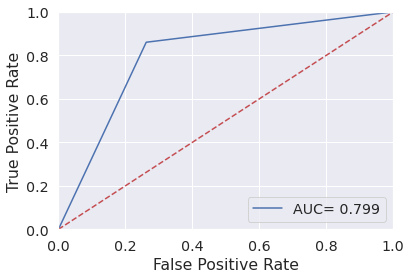

In [32]:
# Plotando curva ROC
fpr,tpr,threshold=roc_curve(y_test,predXGB_v1) 
roc_auc=auc(fpr,tpr)   
plt.plot(fpr,tpr,'b',label= 'AUC= %0.3f' % roc_auc) 
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Gradient Boosting

In [33]:
# Criando modelo Gradient Boosting v1
clc_gbc= GradientBoostingClassifier()
modeloGBC_v1=clc_gbc.fit(X_train,y_train)

In [34]:
# Fazendo previsões modelo 1
predGBC_v1=modeloGBC_v1.predict(X_test)

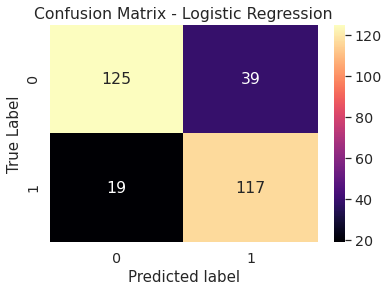

<Figure size 720x504 with 0 Axes>

In [35]:
# Criando matriz de confusão
confusion_matrix = metrics.confusion_matrix(y_test, predGBC_v1)
# Transformando em dataframe
matrix_df = pd.DataFrame(confusion_matrix)
# Plotando matriz de confusão
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
ax.set_title('Confusion Matrix - Logistic Regression')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_ylabel("True Label", fontsize=15)
plt.show()

In [36]:
# Relatório da classificação
print(classification_report(y_test, predGBC_v1))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81       164
           1       0.75      0.86      0.80       136

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.81      0.81      0.81       300



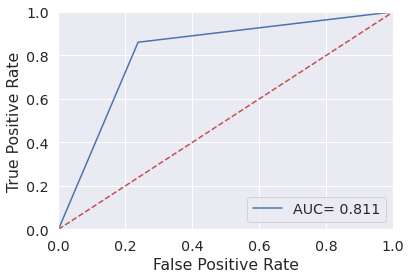

In [37]:
# Plotando curva ROC
fpr,tpr,threshold=roc_curve(y_test,predGBC_v1) 
roc_auc=auc(fpr,tpr)   
plt.plot(fpr,tpr,'b',label= 'AUC= %0.3f' % roc_auc) 
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Random Forest

In [38]:
# Criando modelo Random Forest v1
clc_rf= RandomForestClassifier()
modeloRF_v1= clc_rf.fit(X_train,y_train)

In [39]:
# Fazendo previsões
predRF_v1= modeloRF_v1.predict(X_test)

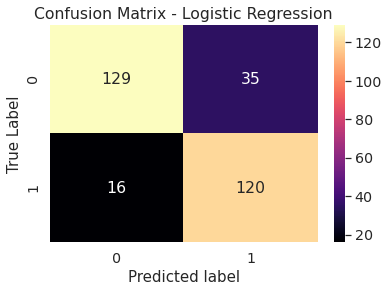

<Figure size 720x504 with 0 Axes>

In [40]:
# Criando matriz de confusão
confusion_matrix = metrics.confusion_matrix(y_test, predRF_v1)
# Transformando em dataframe
matrix_df = pd.DataFrame(confusion_matrix)
# Plotando matriz de confusão
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
ax.set_title('Confusion Matrix - Logistic Regression')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_ylabel("True Label", fontsize=15)
plt.show()

In [41]:
# Relatório da classificação
print(classification_report(y_test, predRF_v1))

              precision    recall  f1-score   support

           0       0.89      0.79      0.83       164
           1       0.77      0.88      0.82       136

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.84      0.83      0.83       300



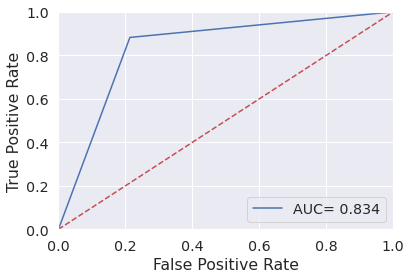

In [42]:
# Plotando curva ROC
fpr,tpr,threshold=roc_curve(y_test,predRF_v1) 
roc_auc=auc(fpr,tpr)   
plt.plot(fpr,tpr,'b',label= 'AUC= %0.3f' % roc_auc) 
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

DIEGO RAMIREZ <br>
daarfarias@hotmail.com <br>
https://github.com/daarfarias